<a href="https://colab.research.google.com/github/lek-bon/finance_theory/blob/main/1_Contango.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
 
uploaded = files.upload()

Saving futures.csv to futures.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('futures.csv', index_col=0)
df['M'] = range(0, len(df))
print(df.head())

             timeseries_id        date   value               created_at  \
id                                                                        
12917314760      166184006  2022-03-14  429.00  2022-03-14 10:30:17.005   
12917314766      149982769  2022-03-14  421.25  2022-03-14 10:30:17.005   
12917314772      149982770  2022-03-14  399.25  2022-03-14 10:30:17.005   
12917314778      149982771  2022-03-14  371.75  2022-03-14 10:30:17.005   
12917314784      149982772  2022-03-14  346.75  2022-03-14 10:30:17.005   

                          updated_at               sname  M  
id                                                           
12917314760  2022-03-14 17:30:20.935  Wheat Black Sea 0M  0  
12917314766  2022-03-14 17:30:20.935  Wheat Black Sea 1M  1  
12917314772  2022-03-14 17:30:20.935  Wheat Black Sea 2M  2  
12917314778  2022-03-14 17:30:20.935  Wheat Black Sea 3M  3  
12917314784  2022-03-14 17:30:20.935  Wheat Black Sea 4M  4  


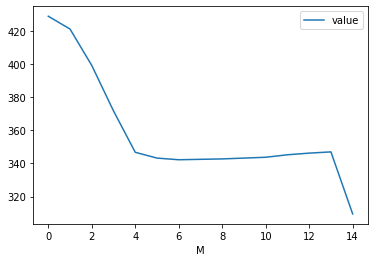

In [4]:
df.plot(x='M', y='value')
plt.show()

In [5]:
selected = df.loc[::,'value']
coefficients, residuals, _, _, _ = np.polyfit(range(len(selected.index)),selected,1,full=True)
mse = residuals[0]/(len(selected.index))
nrmse = np.sqrt(mse)/(selected.max() - selected.min())
print('Slope: ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))

Slope: -5.9339285714285515
NRMSE: 0.1577655948502914


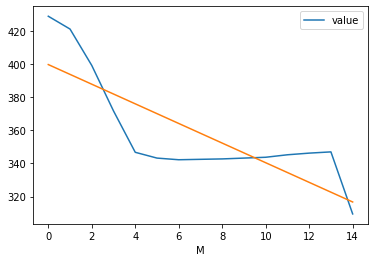

In [7]:
df.plot(x='M', y='value')
plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(selected))])
plt.show()

In [10]:
print ('Contango') if (coefficients[0])>0 else 'Backwardation'

'Backwardation'